In [5]:

# k - Nearest Neighbor Classifier
# Image Dataset

from collections import Counter as count
from matplotlib import pyplot
from itertools import chain
import cPickle as file_get
import numpy as np
import os

get_ipython().magic(u'matplotlib inline')
get_ipython().magic(u'reload_ext autoreload')
get_ipython().magic(u'autoreload 2')

#X = Data
#Y = Label

def image_compare(X, Y):
    var1 = np.sum(np.square(X), axis=1)
    var2 = np.sum(np.square(Y), axis=1)
    var3 = var1 + var2.reshape(len(var2), -1)
    pixel_distances = var3.T - 2 * (X.dot(Y.T))
    return pixel_distances

def images_predict(Y, img_distance, k):
    test_data = img_distance.shape[0]
    label = np.zeros(test_data)
    for i in xrange(test_data):
        labels = Y[np.argsort(img_distance[i,:])].flatten()
        pr_img = labels[0:k]
        label[i] = count(pr_img).most_common(1)[0][0]
    return label

def training_dataset():
    data_s = []
    label_s = []
    for file_batch in range(1,6):
        data_file = os.path.join('cifar-10-batches-py', 'data_batch_%d' % (file_batch, ))
        with open(data_file, 'rb') as filename:
            temp_images = file_get.load(filename)
            X = temp_images['data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
            Y = np.array(temp_images['labels'])
        data_s.append(X)
        label_s.append(Y)
    train_data = np.concatenate(data_s)
    train_label = np.concatenate(label_s)
    del X, Y
    return train_data, train_label

def test_dataset():
    with open(os.path.join('cifar-10-batches-py', 'test_batch'), 'rb') as filename:
        temp_images = file_get.load(filename)
        test_data = temp_images['data'].reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        test_label = np.array(temp_images['labels'])
    return test_data, test_label

data_t, label_t = training_dataset()
test_data, test_label = test_dataset()

print('Training data shape: ', data_t.shape)
print('Test data shape: ', test_data.shape)


('Training data shape: ', (50000, 32, 32, 3))
('Test data shape: ', (10000, 32, 32, 3))


In [2]:
##############################################################

total_images = [[range(5000)], [range(500)]]
data_t = data_t[total_images[0]]
label_t = label_t[total_images[0]]
test_data = test_data[total_images[1]]
test_label = test_label[total_images[1]]

data_t = np.reshape(data_t, (data_t.shape[0], -1))
test_data = np.reshape(test_data, (test_data.shape[0], -1))

# Five batches of data
data_spilt = np.array_split(data_t, 5)
label_spilt = np.array_split(label_t, 5)



all_accuracy = {}
k = []
for i in range(1,15,1):
    k.append(i)
for i in range(15,50,5):
    k.append(i)
for i in range(50,110,10):
    k.append(i)


train_data_size = len(data_spilt[0])

correct_label = {}

for value in k:
    all_accuracy[value] = []
    correct_label[value] = []
    for i in range(5):
        temp_data = data_spilt[i]
        temp_label = label_spilt[i]

        sample_data = list(chain(range(0,train_data_size*i), range(train_data_size*(i+1), train_data_size*5)))
        
        data_sample_train = data_t[sample_data]
        label_sample_train = label_t[sample_data]
        
        pixel_distances = image_compare(temp_data, data_sample_train)
        predict_label = images_predict(label_sample_train, pixel_distances, value)
        
        exact_labels = np.sum(predict_label == temp_label)
        correct_label[value].append(exact_labels)
        # label_size = len(temp_label)
        accuracy = float(exact_labels) / len(temp_label)
        all_accuracy[value].append(accuracy)



max_acc = {}
for key, all_accuracy[key] in all_accuracy.iteritems():
    max_acc.update({key : max(all_accuracy[key])})

('Different K value identified', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100])
Maximum Accuracy for each K value identified:
k = 1, Maximum Accuracy = 0.278000
k = 2, Maximum Accuracy = 0.263000
k = 3, Maximum Accuracy = 0.273000
k = 4, Maximum Accuracy = 0.296000
k = 5, Maximum Accuracy = 0.290000
k = 6, Maximum Accuracy = 0.288000
k = 7, Maximum Accuracy = 0.291000
k = 8, Maximum Accuracy = 0.288000
k = 9, Maximum Accuracy = 0.287000
k = 10, Maximum Accuracy = 0.296000
k = 11, Maximum Accuracy = 0.297000
k = 12, Maximum Accuracy = 0.294000
k = 13, Maximum Accuracy = 0.288000
k = 14, Maximum Accuracy = 0.288000
k = 15, Maximum Accuracy = 0.290000
k = 20, Maximum Accuracy = 0.284000
k = 25, Maximum Accuracy = 0.286000
k = 30, Maximum Accuracy = 0.286000
k = 35, Maximum Accuracy = 0.284000
k = 40, Maximum Accuracy = 0.284000
k = 45, Maximum Accuracy = 0.280000
k = 50, Maximum Accuracy = 0.288000
k = 60, Maximum Accuracy = 0.282000


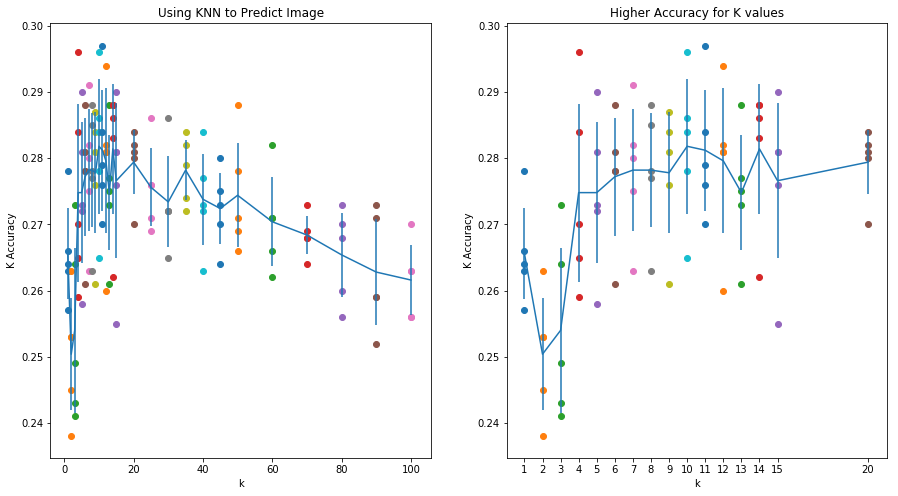

Got 132 / 500 correct => accuracy: 0.264000 for K= 11


In [3]:

pyplot.rcParams['figure.figsize'] = (15.0, 8.0)
pyplot.rcParams['image.interpolation'] = 'nearest'
pyplot.rcParams['image.cmap'] = 'gray'

print('Different K value identified', k )
print('================================================================')

print('Maximum Accuracy for each K value identified:')
for sk in all_accuracy:
    print('k = %d, Maximum Accuracy = %f' % (sk, max(all_accuracy[sk])))
print('================================================================')

max_acc1 = max(max_acc, key=max_acc.get)
print('Maximum Accuracy achieved at K = %d' % (max_acc1))
print('================================================================')

#plot the graph
#Total graph for all K values
pyplot.subplot(1, 2, 1)
    
for value in k:
    correctness = all_accuracy[value]
    pyplot.scatter([value] * 5, correctness)

result_mean = np.array([np.mean(acc_var) for skv,acc_var in sorted(all_accuracy.items())])
result_deviation = np.array([np.std(acc_var) for skv,acc_var in sorted(all_accuracy.items())])

pyplot.errorbar(k, result_mean, yerr=result_deviation)
pyplot.title('Using KNN to Predict Image')
pyplot.xlabel('k')
pyplot.ylabel('K Accuracy')

#Total graph for limited K values
pyplot.subplot(1, 2, 2)

K_lim = [i for i in k if i <= 20]
for value in K_lim:
    correctness = all_accuracy[value]
    pyplot.scatter([value] * 5, correctness)

lim_all_accuracy = {}
for key in all_accuracy:
    if key <= 20:
        lim_all_accuracy[key] = all_accuracy.get(key)


lim_result_mean = np.array([np.mean(acc_var) for skv,acc_var in sorted(lim_all_accuracy.items())])
lim_result_deviation = np.array([np.std(acc_var) for skv,acc_var in sorted(lim_all_accuracy.items())])

pyplot.errorbar(K_lim, lim_result_mean, yerr=lim_result_deviation)
pyplot.xticks(K_lim)
pyplot.title('Higher Accuracy for K values')
pyplot.xlabel('k')
pyplot.ylabel('K Accuracy')
pyplot.show()

print('================================================================')

pixel_distances = image_compare(test_data, data_t)
predict_label = images_predict(label_t, pixel_distances, k=max_acc1)
exact_labels = np.sum(predict_label == test_label)
accuracy = float(exact_labels) / 500
print('Got %d / 500 correct => accuracy: %f for K= %d' % (exact_labels ,accuracy,max_acc1))
    
print('================================================================')
